In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline              
import seaborn as sns 
import warnings
from pandas.plotting import parallel_coordinates #for multivariate plots
warnings.filterwarnings('ignore') #ignore deprecation warnings

In [178]:
# Import data 

df = pd.read_csv("../data/Asteroid_Updated.csv")

df.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [179]:
df.columns

Index(['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G',
       'moid', 'class', 'n', 'per', 'ma'],
      dtype='object')

In [180]:
len(df)

839714

In [181]:
df['diameter'].isna().sum()

702078

In [182]:
# Filter out entries that do not have diameter values (which is almost 80% of the datsset)
# The fact that 80% of rows have missing diameter values is not an issue, considering the remaining dataset would have 120k+ rows 

df_filtered = df[~df['diameter'].isna()]


len(df_filtered)

137636

In [183]:
df_filtered.isna().sum()

name              122512
a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc             138
condition_code         0
n_obs_used             0
H                    747
neo                    0
pha                    0
diameter               0
extent            137620
albedo              1230
rot_per           126448
GM                137622
BV                136631
UB                136671
IR                137635
spec_B            136266
spec_T            136671
G                 137517
moid                   0
class                  0
n                      0
per                    0
ma                     0
dtype: int64

In [184]:
df_filtered.describe()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,rot_per,GM,BV,UB,IR,G,moid,n,per,ma
count,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137498.000000,137636.000000,...,11188.000000,1.400000e+01,1005.000000,965.000000,1.00,119.000000,137636.000000,137636.000000,1.376360e+05,137636.000000
mean,2.814613,0.145485,10.349182,169.827629,181.904551,2.402609,3.226618,4.884248,8969.818601,675.027740,...,23.566011,7.821928e+00,0.768844,0.364108,-0.33,0.178739,1.420145,0.219640,1.783972e+03,183.116785
std,1.522740,0.077573,6.835111,102.713052,103.556464,0.516169,2.896374,25.532565,6165.176190,595.935104,...,74.829904,1.678880e+01,0.088327,0.095707,NaN,0.134603,0.512241,0.056980,9.325769e+03,103.411497
min,0.626226,0.000489,0.021855,0.000738,0.004466,0.081882,0.999956,0.495569,1.000000,5.000000,...,0.029952,2.100000e-09,0.580000,0.120000,-0.33,-0.250000,0.000166,0.000128,1.810067e+02,0.000517
25%,2.536714,0.089623,5.120506,82.334880,91.947943,2.068948,2.864438,4.040317,6291.000000,215.000000,...,4.670000,1.022225e-03,0.700000,0.289000,-0.33,0.100000,1.082523,0.181231,1.475726e+03,94.301261
50%,2.750859,0.138543,9.389963,160.438430,183.669900,2.363897,3.167516,4.562581,7572.000000,496.000000,...,7.560000,6.192500e-01,0.743000,0.360000,-0.33,0.190000,1.384935,0.216024,1.666483e+03,186.826667
75%,3.092537,0.191141,13.738588,256.268387,271.762261,2.685811,3.468608,5.438518,9731.000000,984.000000,...,14.579500,6.500000e+00,0.850000,0.439000,-0.33,0.250000,1.699385,0.243948,1.986419e+03,271.468299
max,389.145964,0.984348,170.323647,359.990858,359.995174,40.465671,772.201080,7676.742943,72684.000000,9325.000000,...,1880.000000,6.262840e+01,1.077000,0.655000,-0.33,0.600000,39.507000,1.988877,2.803930e+06,359.999979


We will have to normalize as the units and scales are very different for every variable.

In [185]:
# Filter out useless columns

# The below columns are either almost all na or are not useful 
useless_columns = ['name' , 'extent' , 'IR' , 'spec_B' , 'spec_T' , 'class', 'rot_per', 'GM', 'BV', 'UB', 'G', 'per', 'condition_code']


df_filtered = df_filtered.drop(columns=useless_columns)

df_filtered

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,neo,pha,diameter,albedo,moid,n,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,1002,3.34,N,N,939.4,0.0900,1.59478,0.213885,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,8490,4.13,N,N,545,0.1010,1.23324,0.213503,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,7104,5.33,N,N,246.596,0.2140,1.03454,0.226019,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,9325,3.20,N,N,525.4,0.4228,1.13948,0.271609,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,2916,6.85,N,N,106.699,0.2740,1.09589,0.238632,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797860,3.171225,0.159119,27.098625,309.036573,19.746812,2.666623,3.675826,5.647402,2373.0,50,16.20,N,N,3.793,0.0210,1.66301,0.174527,164.999439
798077,2.548410,0.076071,11.593237,246.298656,170.090810,2.354549,2.742270,4.068291,3297.0,33,17.30,N,N,2.696,0.0610,1.36733,0.242270,145.319581
798189,3.146246,0.220559,17.966646,137.981403,180.898833,2.452313,3.840180,5.580811,2839.0,47,16.80,N,N,2.917,NaN,1.43837,0.176610,174.609920
799752,3.051336,0.287449,14.456779,343.917822,342.614839,2.174231,3.928440,5.330196,2208.0,27,17.20,N,N,3.271,0.0720,1.16684,0.184914,175.708508


In [186]:
# Check type values 

df_filtered.dtypes

a             float64
e             float64
i             float64
om            float64
w             float64
q             float64
ad            float64
per_y         float64
data_arc      float64
n_obs_used      int64
H             float64
neo            object
pha            object
diameter       object
albedo        float64
moid          float64
n             float64
ma            float64
dtype: object

In [187]:
# Convert diameter to float

df_filtered['diameter'] = df_filtered['diameter'].astype('float64')

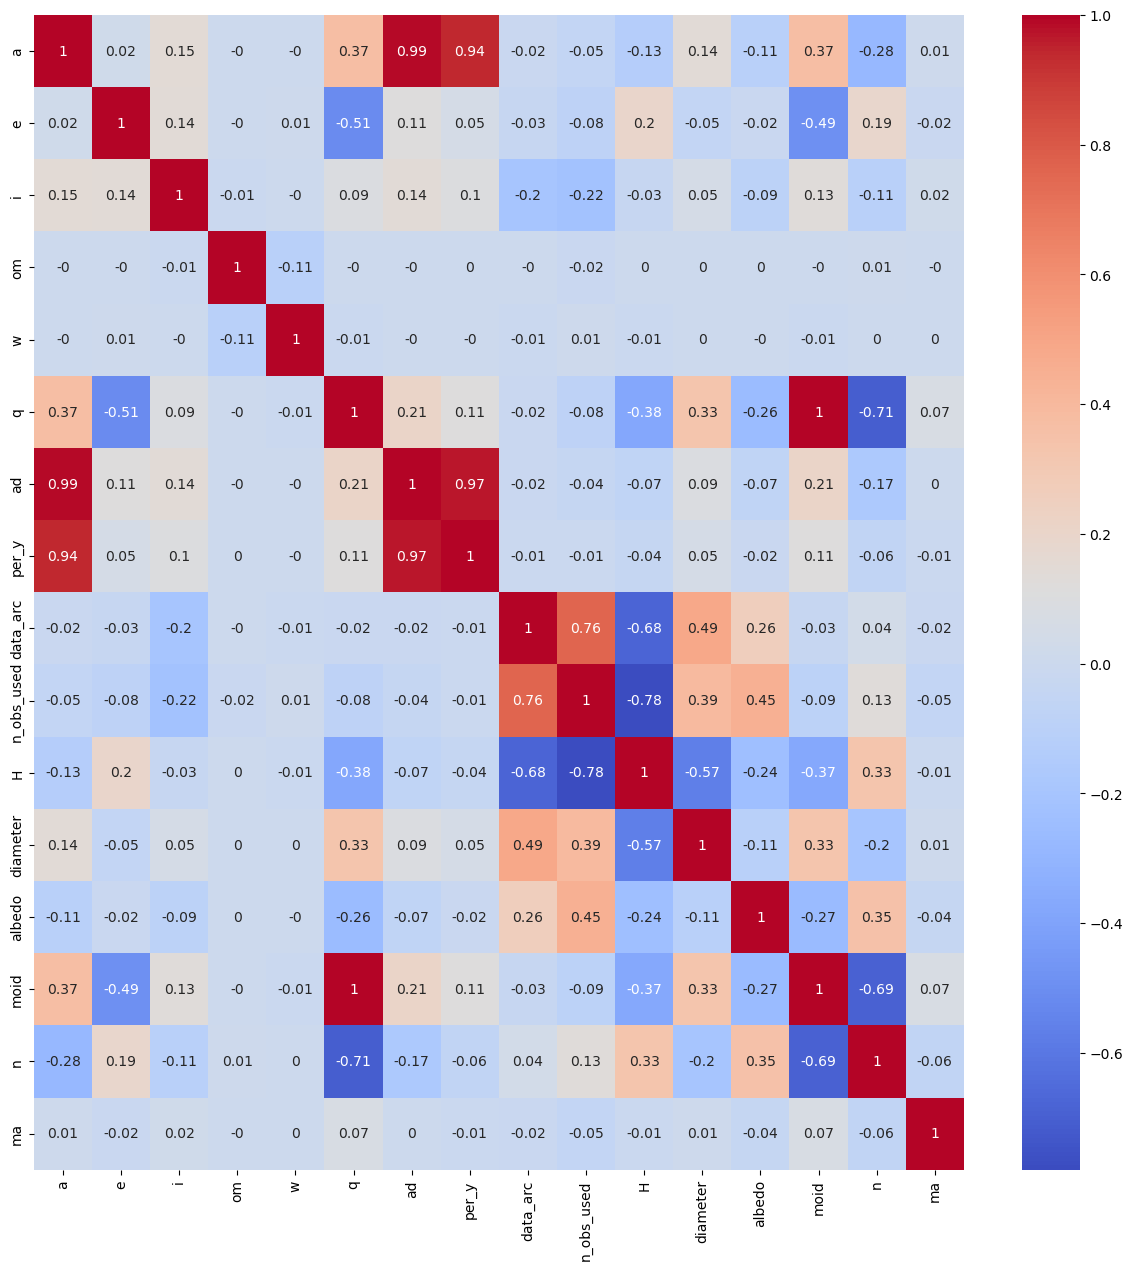

In [188]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 15))
corr_matrix = df_filtered.corr().round(decimals=2)
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()


# Categorical Data (NEO - Near Earth Objects and PHA - Potentially Hazardous Asteroids)

In [77]:
# Custom function for easy visualisation of Categorical Variables
def UVA_variable(data, var):

  '''
  Univariate_Analysis_categorical
  takes a categorical variable and plots/prints all the value_counts and a barplot.
  '''
  # setting figure_size
  size = len(var)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

/Users/Tegveer/miniforge3/envs/ANLY501/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Tegveer/miniforge3/envs/ANLY501/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


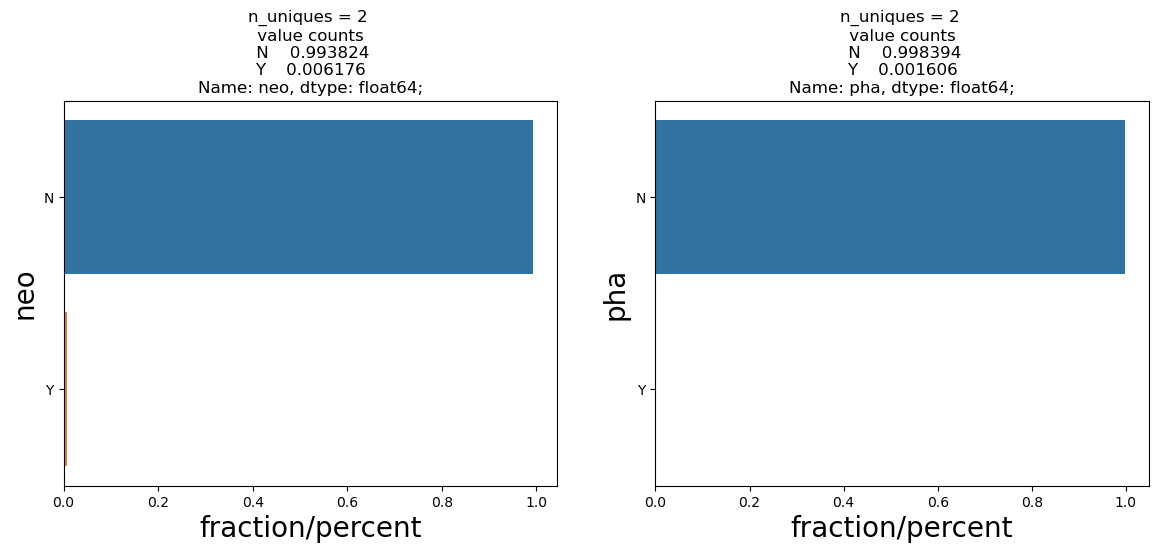

In [62]:
UVA_variable(df_filtered, ['neo', 'pha'])

# Numerical Data EDA

In [104]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (4*size,2), dpi=150)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    #mode = data[i].mode().values[0] # Convert mode output to a scalar value
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    #sns.scatterplot([mode], [0], color = 'green', label = "mode")
    plt.xlabel('{}'.format(i), fontsize = 10)
    plt.ylabel('Density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

In [102]:
# segregating variables into groups
group1 = df_filtered[['a', 'e', 'i']]  # Group 1: Orbital elements (semi-major axis, eccentricity, inclination)
group2 = df_filtered[['om', 'w', 'q']]  # Group 2: Orbital elements (longitude of ascending node, argument of periapsis, perihelion distance)
group3 = df_filtered[['ad', 'per_y']]  # Group 3: Orbital elements (aphelion distance, period in years)
group4 = df_filtered[['data_arc', 'condition_code', 'n_obs_used']]  # Group 4: Observation data (data arc length, condition code, number of observations used)
group5 = df_filtered[['H', 'diameter', 'albedo']]  # Group 5: Physical properties (absolute magnitude, diameter, albedo)
group6 = df_filtered[['moid', 'n', 'per', 'ma']]  # Group 6: Miscellaneous (minimum orbit intersection distance, mean motion, orbital period, mean anomaly)

In [105]:
UVA_numeric(df_filtered,group1)

ValueError: Image size of 82581600x300 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 8.25816e+07x300 with 3 Axes>

In [ ]:
UVA_numeric(data,group2)

In [ ]:
UVA_numeric(data,group3)

In [ ]:
UVA_numeric(data,group4)

In [ ]:
UVA_numeric(data,group5)

In [ ]:
UVA_numeric(data,group6)

# Remove remaining few NAs

In [189]:
# remove NAs from the dataset

df_filtered = df_filtered.dropna()

# Rename columns

In [191]:
df_filtered = df_filtered.rename(columns={'a':'semi_major_axis' , 'e':'eccentricity',
                                          'i':'inclination' , 'om':'longitude_node',
                                          'w':'perihelion',
                                          'q':'perihelion_distance',
                                          'ad':'aphelion_distance',
                                          'per_y':'orbital_period_years',
                                          'H':'absolute_magnitude',
                                          'neo':'near_earth_object',
                                          'pha':'potential_hazardous_asteroid',
                                          'moid':'min_orbit_intersection',
                                          'n':'mean_motion',
                                          'per':'orbital_period',
                                          'ma':'mean_anomaly',
                                          'n_obs_used':'n_obs_radar_total'})

In [192]:
df_filtered

,semi_major_axis,eccentricity,inclination,longitude_node,perihelion,perihelion_distance,aphelion_distance,orbital_period_years,data_arc,n_obs_radar_total,absolute_magnitude,near_earth_object,potential_hazardous_asteroid,diameter,albedo,min_orbit_intersection,mean_motion,mean_anomaly
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,1002,3.34,N,N,939.400,0.0900,1.594780,0.213885,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,8490,4.13,N,N,545.000,0.1010,1.233240,0.213503,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,7104,5.33,N,N,246.596,0.2140,1.034540,0.226019,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,9325,3.20,N,N,525.400,0.4228,1.139480,0.271609,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,2916,6.85,N,N,106.699,0.2740,1.095890,0.238632,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797835,3.155975,0.430349,28.718353,115.532995,136.849398,1.797805,4.514145,5.606716,2250.0,47,18.20,N,N,1.077,0.1160,0.854315,0.175794,195.737632
797860,3.171225,0.159119,27.098625,309.036573,19.746812,2.666623,3.675826,5.647402,2373.0,50,16.20,N,N,3.793,0.0210,1.663010,0.174527,164.999439
798077,2.548410,0.076071,11.593237,246.298656,170.090810,2.354549,2.742270,4.068291,3297.0,33,17.30,N,N,2.696,0.0610,1.367330,0.242270,145.319581
799752,3.051336,0.287449,14.456779,343.917822,342.614839,2.174231,3.928440,5.330196,2208.0,27,17.20,N,N,3.271,0.0720,1.166840,0.184914,175.708508


# Encode categorical variables (NEO, PHA)

In [193]:
# dummy variables for categorical variables

df_filtered = pd.get_dummies(df_filtered, columns=['near_earth_object', 'potential_hazardous_asteroid'])

# Output Cleaned Data

In [195]:
df_filtered.to_csv('../data/asteroid_cleaned.csv', index=False)